# Supervised Machine Learning by @attzulkafli.

## Multidimensional linear regression
The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form

$$y=\beta_0+\beta_1x_1+\beta_2x_2+⋯+\beta_nx_n$$

where there are multiple $x$ values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize. Nonetheless, the general steps for fitting a model to data outlined for the one-dimensional case above remain the same.

$$y=\beta_0+\beta_1x_1+\beta_2x_2+⋯+\beta_nx_n$$
Example for below
$$y=c+1.5x_1-2x_2+x_n$$



In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [11]:
import pandas as pd

In [14]:
import matplotlib.pyplot as plt

In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
# b0 = 0.5, b1 = 1.5, b2 = -2, b3 = 1
y = 0.5 + 1.5 * X[:, 0] - 2 * X[:, 1] + 1 * X[:, 2] + np.random.randn(100)

#create and fit
model = LinearRegression()
model.fit(X, y)
yfit=model.predict(X)

print("Intercept:    {}".format(model.intercept_))
print("Coefficients: {}".format(model.coef_))

Intercept:    0.38963135776138436
Coefficients: [ 1.55248413 -2.03236311  1.002092  ]


In [6]:
X.shape

(100, 3)

In [9]:
print("Intercept:    {}".format(model.intercept_))
print("Coefficients: {}".format(model.coef_))
print("MSE: {}". format(mean_squared_error(y,yfit)))
print("R-squares: {}". format(r2_score(y,yfit)))

Intercept:    0.38963135776138436
Coefficients: [ 1.55248413 -2.03236311  1.002092  ]
MSE: 1.0105429202303846
R-squares: 0.9853152882937759


In [10]:
print("Coefficients: {}".format(model.coef_[0]))

Coefficients: 1.5524841250643013


### Exercise - Effects of Advertising on Sales

Imagine that your company wants to increase sales on a certain product. You cannot increase sales directly, but you can adjust advertising.

The advertising dataset in the file `data/advertising.csv` contains information on money spent on advertising via various channels as well as revenue for a product. Each row represents a separate time interval, e.g. a week's worth of sales. For the sake of simplicity we'll ignore confounding factors like seasonality.

The features are:
- TV: advertising dollars spent on TV
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

and the response is:
- Sales: sales of a single product in a given market

All numbers are in thousands of dollars, e.g. 14.4 is equivalent to \$14,400.

In [12]:
sales = pd.read_csv("../data/advertising.csv", index_col=0)
sales.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


TV ad intercept: 7.032593549127693
TV ad slope:     0.047536640433019764
R2 for TV:       0.611875050850071


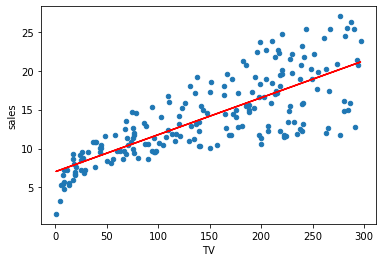

In [15]:
model_tv = LinearRegression().fit(sales[["TV"]], sales["sales"])
print("TV ad intercept: {}".format(model_tv.intercept_))
print("TV ad slope:     {}".format(model_tv.coef_[0]))

r2score_tv = r2_score(sales["sales"], model_tv.predict(sales[["TV"]]))
print("R2 for TV:       {}".format(r2score_tv))

sales.plot(x="TV", y="sales", kind="scatter")
plt.plot(sales[["TV"]], model_tv.predict(sales[["TV"]]), c='red');

Radio ad intercept: 9.311638095158283
Radio ad slope:     [0.20249578]
R2 for Radio:       0.33203245544529525


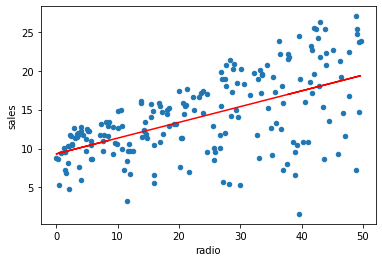

In [16]:
model_radio = LinearRegression().fit(sales[["radio"]], sales["sales"])
r2score_radio = r2_score(sales["sales"],model_radio.predict(sales[["radio"]]))

sales.plot("radio", "sales", "scatter")
plt.plot(sales[["radio"]], model_radio.predict(sales[["radio"]]), 'red');

print("Radio ad intercept: {}".format(model_radio.intercept_))
print("Radio ad slope:     {}".format(model_radio.coef_))
print("R2 for Radio:       {}".format(r2score_radio))

Newspaper ad intercept: 12.35140706927816
Newspaper ad slope:     [0.0546931]
R2 for newspaper:       0.05212044544430516


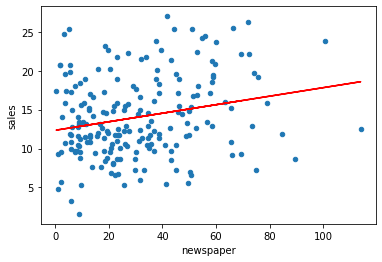

In [23]:
model_np = LinearRegression().fit(sales[["newspaper"]], sales["sales"])
r2score_np = r2_score(sales["sales"],model_np.predict(sales[["newspaper"]]))

sales.plot("newspaper", "sales", "scatter")
plt.plot(sales[["newspaper"]], model_np.predict(sales[["newspaper"]]), 'red');

print("Newspaper ad intercept: {}".format(model_np.intercept_))
print("Newspaper ad slope:     {}".format(model_np.coef_))
print("R2 for newspaper:       {}".format(r2score_np))

TV ad intercept: 7.032593549127693
TV ad slope:     [0.04753664]
R2 for TV:       0.611875050850071


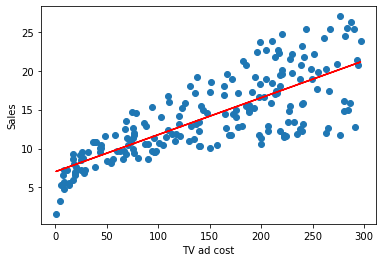

In [17]:
# you can do this too / alternative

X=sales[["TV"]]
Y=sales["sales"]

model_tv = LinearRegression()
model_tv.fit(X,Y)
print("TV ad intercept: {}".format(model_tv.intercept_))
print("TV ad slope:     {}".format(model_tv.coef_))


yfit = model_tv.predict(X)
r2score_tv = r2_score(Y,yfit)
print("R2 for TV:       {}".format(r2score_tv))

plt.scatter(X,Y)
plt.xlabel("TV ad cost")
plt.ylabel("Sales");
plt.plot(X, yfit, c='red');

**Discussion questions:**

#### Which ad types have the strongest and weakest influence on sales?

The R2 score indicates how good a fit is and therefore how strong a feature's influence is.
A low R2 score means that the model is extremely unreliable and a large fraction of the variation
in the target values (i.e. sales) cannot be explained by the model. That means even if we 
increased the budget for newspaper ads, we can't be sure that would actually lead to an 
increase in sales. A look at the plot above shows that there is virtually no correlation between 
sales and newspaper ad budget.

On the other hand, the budget for TV predict sales quite accurately, i.e. the model trained only on 
the TV ad budget explains a large fraction of the variance in the sales numbers. We can be reasonably
certain that an increase in the TV ad budget will lead to an increase in sales.


#### For each ad type, how much is the expected sales given an additional budget of 10 thousand dollar for that ad type?

If the target value, sales, is expressed as
sales = intercept_ + coef_ * ad_budget
then the slope (coef_) indicates how much the sales value changes when ad_budget changes.
The increase in expected sales can be determined via

  sales = intercept_ + coef_ * (ad_budget + 10)
  
        = intercept_ + coef_ * ad_budget + 10 * coef_
        
        
So that an increase of 10k in an advertisement's budget leads to an increase of 10 * coef_ in sales

In [20]:
sale_pred1 = model_tv.intercept_ +  model_tv.coef_*X
sale_pred2 = sale_pred1 + model_tv.coef_*10

In [25]:
# for TV
model_tv.coef_ * (10)       # increase

array([0.4753664])

In [21]:
# for radio
model_radio.coef_ * (10)       # increase

array([2.02495783])

In [24]:
# for newspaper
model_np.coef_ * (10)       # increase

array([0.54693098])

Let's see if we can improve the model performance with a multiple linear regression
- Train a multiple linear regression model on all ad types simultaneously. How well does it perform?
- How do the coefficients change versus the simple linear regression?

In [26]:
# MC
model = LinearRegression().fit(sales[["TV", "radio", "newspaper"]], sales["sales"])

r2score = r2_score(sales["sales"], model.predict(sales[["TV", "radio", "newspaper"]]))
print("R2 of MLR:        {}".format(r2score))
print()
print("TV ad SLR:        {}".format(model_tv.coef_[0]))
print("TV ad MLR:        {}".format(model.coef_[0]))
print()
print("Radio ad SLR:     {}".format(model_radio.coef_[0]))
print("Radio ad MLR:     {}".format(model.coef_[1]))
print()
print("Newspaper ad SLR: {}".format(model_np.coef_[0]))
print("Newspaper ad MLR: {}".format(model.coef_[2]))

R2 of MLR:        0.8972106381789522

TV ad SLR:        0.047536640433019764
TV ad MLR:        0.04576464545539761

Radio ad SLR:     0.20249578339243965
Radio ad MLR:     0.18853001691820462

Newspaper ad SLR: 0.05469309847227336
Newspaper ad MLR: -0.0010374930424762972


- What are the expected sales given a new budget of TV=100, Radio=25 and Newspaper=25?

In [80]:
model.predict(X=[[100, 25, 25]])

array([12.20266701])

# Feature Scaling


#### Standardisation:

$$x_{scaled} = \frac{x - \bar {x}}{s}$$

Where $\bar{x} =  mean(x)$, and $s = std(x)$.

Therefore, $mean(x_{scaled}) = 0$ , and $std(x_{scaled}) = 1$. 
In case of presence of outliers for the feature x, this method is not helpful to set the range of $x_{scaled}$. 


#### Min-Max Scaling: 

$$x_{scaled}=\frac{x-x_{min}}{x_{max} - x_{min}} $$

Therefore, $range(x_{scaled}) = [0 , 1]$


#### Mapping to a Gaussian distribution, PowerTransformer:

PowerTransformer aims to map data from any distribution to as close to a Gaussian (Normal) distribution as possible in order to stabilize variance and minimize skewness. In general, you'll only want to normalize your data if you're going to use a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, and Gaussian naive Bayes. 


### Feature Scaling in Python:

For each scaling methods "Standardisation" and Min-Max Scaling, we can call the relevant methods from `sklearn.preprocessing`. 


#### Standardisation in Python:

`from sklearn.preprocessing import StandardScaler`

`scaler = StandardScaler().fit(x)`

`x_scaled = scaler.transform(x)`


#### Min-Max Scaling in Python: 

`from sklearn.preprocessing import MinMaxScaler`

`scaler = MinMaxScaler().fit(x)`

`x_scaled = scaler.transform(x)`


#### Mapping to a Gaussian distribution, PowerTransformer:

`from sklearn.preprocessing import PowerTransformer`

`pt = PowerTransformer(method='box-cox', standardize=True)`

In PowerTransformer, you need to set the hyperparameter `method='box-cox'` if the data is positive. For negative data you need to set `method='yeo-johnson'`. Hyperparameter `standardize=True` applies zero-mean, unit-variance normalization to the transformed output.

`x_scaled = pt.fit_transform(x)` 

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer 

In [29]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

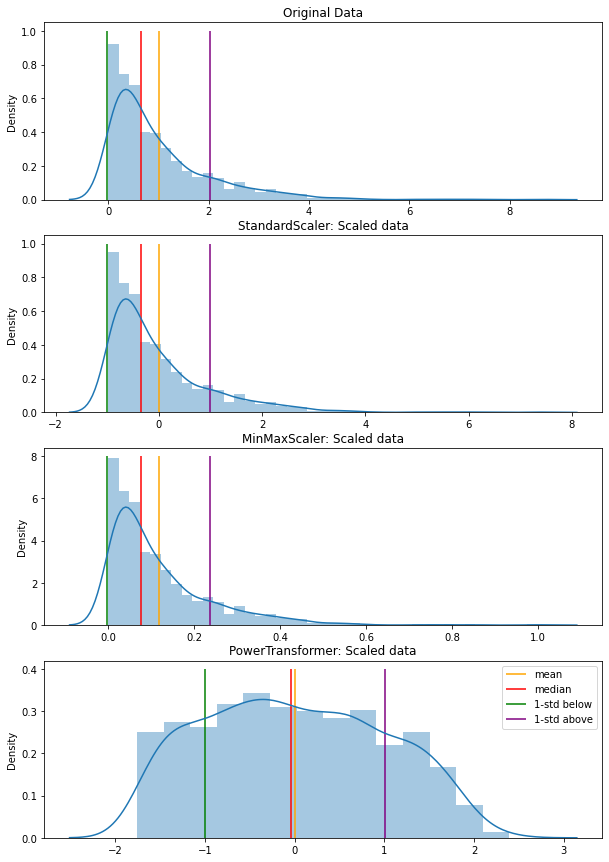

In [30]:
# set seed for reproducibility
np.random.seed(0)

# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)[:,np.newaxis]

# StandardScaler scale the datba between 0 and 1
scaler_std = StandardScaler().fit(original_data)
scaled_std = scaler_std.transform(original_data)

# MinMaxScaler scale the data between 0 and 1
scaler_Mm = MinMaxScaler().fit(original_data)
scaled_Mm = scaler_Mm.transform(original_data)

# MinMaxScaler scale the data between 0 and 1
scaler_PT = PowerTransformer().fit(original_data)
scaled_PT = scaler_PT.transform(original_data)

# plot both together to compare
fig, ax=plt.subplots(4,1)
fig.set_size_inches(10, 15)

sns.distplot(original_data, ax=ax[0])
ax[0].vlines(np.mean(original_data), ymin = 0, ymax = 1, 
                               color = 'orange', label = 'mean')
ax[0].vlines(np.median(original_data), ymin = 0, ymax = 1, 
                            color = 'red', label = 'median')
ax[0].vlines(np.mean(original_data) - np.std(original_data, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'green', label = '1-std below')
ax[0].vlines(np.mean(original_data) + np.std(original_data, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'purple', label = '1-std above')
ax[0].set_title("Original Data")


sns.distplot(scaled_std, ax=ax[1])
ax[1].set_title("StandardScaler: Scaled data")
ax[1].vlines(np.mean(scaled_std), ymin = 0, ymax = 1, 
                               color = 'orange', label = 'mean')
ax[1].vlines(np.median(scaled_std), ymin = 0, ymax = 1, 
                            color = 'red', label = 'median')
ax[1].vlines(np.mean(scaled_std) - np.std(scaled_std, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'green', label = '1-std below')
ax[1].vlines(np.mean(scaled_std) + np.std(scaled_std, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'purple', label = '1-std above')


sns.distplot(scaled_Mm, ax=ax[2])
ax[2].set_title("MinMaxScaler: Scaled data")
ax[2].vlines(np.mean(scaled_Mm), ymin = 0, ymax = 8, 
                               color = 'orange', label = 'mean')
ax[2].vlines(np.median(scaled_Mm), ymin = 0, ymax = 8, 
                            color = 'red', label = 'median')
ax[2].vlines(np.mean(scaled_Mm) - np.std(scaled_Mm, ddof = 1), ymin = 0, ymax = 8, 
                               color = 'green', label = '1-std below')
ax[2].vlines(np.mean(scaled_Mm) + np.std(scaled_Mm, ddof = 1), ymin = 0, ymax = 8, 
                               color = 'purple', label = '1-std above')


sns.distplot(scaled_PT, ax=ax[3])
ax[3].set_title("PowerTransformer: Scaled data")
ax[3].vlines(np.mean(scaled_PT), ymin = 0, ymax = .4, 
                               color = 'orange', label = 'mean')
ax[3].vlines(np.median(scaled_PT), ymin = 0, ymax = .4, 
                            color = 'red', label = 'median')
ax[3].vlines(np.mean(scaled_PT) - np.std(scaled_PT, ddof = 1), ymin = 0, ymax = .4, 
                               color = 'green', label = '1-std below')
ax[3].vlines(np.mean(scaled_PT) + np.std(scaled_PT, ddof = 1), ymin = 0, ymax = .4, 
                               color = 'purple', label = '1-std above')

plt.legend()
plt.show()

**Example: Impact of scaling on sales dataset**

In [31]:
X = sales[["TV", "radio", "newspaper"]]
scaled_X = PowerTransformer().fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


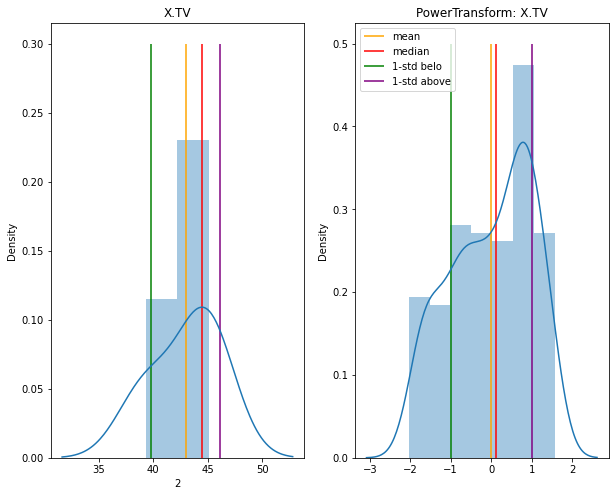

In [32]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
fig.set_size_inches(10, 8)

sns.distplot(X.iloc[1,:], ax=ax[0])
ax[0].vlines(np.mean(X.iloc[1,:]), ymin = 0, ymax = .3, 
                               color = 'orange', label = 'mean')
ax[0].vlines(np.median(X.iloc[1,:]), ymin = 0, ymax = .3, 
                            color = 'red', label = 'median')
ax[0].vlines(np.mean(X.iloc[1,:]) - np.std(X.iloc[1,:], ddof = 1), ymin = 0, ymax = .3, 
                               color = 'green', label = '1-std below')
ax[0].vlines(np.mean(X.iloc[1,:]) + np.std(X.iloc[1,:], ddof = 1), ymin = 0, ymax = .3, 
                               color = 'purple', label = '1-std above')
ax[0].set_title("X.TV")


sns.distplot(scaled_X[:,0], ax=ax[1])
ax[1].set_title("PowerTransform: X.TV")
ax[1].vlines(np.mean(scaled_X[:,0]), ymin = 0, ymax = .5, 
                               color = 'orange', label = 'mean')
ax[1].vlines(np.median(scaled_X[:,0]), ymin = 0, ymax = .5, 
                            color = 'red', label = 'median')
ax[1].vlines(np.mean(scaled_X[:,0]) - np.std(scaled_X[:,0], ddof = 1), ymin = 0, ymax = .5, 
                               color = 'green', label = '1-std belo')
ax[1].vlines(np.mean(scaled_X[:,0]) + np.std(scaled_X[:,0], ddof = 1), ymin = 0, ymax = .5, 
                               color = 'purple', label = '1-std above')

plt.legend()
plt.show()

In [33]:
model = LinearRegression().fit(X, sales["sales"])

r2score = r2_score(sales["sales"], model.predict(X))
print("R2 of MLR :        {}".format(r2score))
print("MSE of MLR:        {}".format(mean_squared_error(sales["sales"], model.predict(X))))


print()
print("TV ad MLR :        {}".format(model.coef_[0]))
print()
print("Radio ad MLR:     {}".format(model.coef_[1]))
print()
print("Newspaper ad MLR: {}".format(model.coef_[2]))

R2 of MLR :        0.8972106381789522
MSE of MLR:        2.784126314510936

TV ad MLR :        0.04576464545539761

Radio ad MLR:     0.18853001691820462

Newspaper ad MLR: -0.0010374930424762972


In [100]:
model_scaled = LinearRegression().fit(scaled_X, sales["sales"])

r2score = r2_score(sales["sales"], model_scaled.predict(scaled_X))
print("R2 of MLR:        {}".format(r2score))
print("MSE of MLR:        {}".format(mean_squared_error(sales["sales"], model_scaled.predict(scaled_X))))


print()
print("TV ad MLR:        {}".format(model_scaled.coef_[0]))
print()
print("Radio ad MLR:     {}".format(model_scaled.coef_[1]))
print()
print("Newspaper ad MLR: {}".format(model_scaled.coef_[2]))

R2 of MLR:        0.9074639862122942
MSE of MLR:        2.5064067571002666

TV ad MLR:        3.9707553863143206

Radio ad MLR:     2.764248080722213

Newspaper ad MLR: 0.0643293016332074


## Handling Categorical Predictors with Two Categories

Up to now, all of our predictors have been numeric. What if one of our predictors was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [34]:
sales.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [35]:
# set a seed for reproducibility
np.random.seed(42)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(sales))
mask_large = nums > 0.5

# initially set Size to s mall, then change roughly half to be large
sales_size = sales.copy()
sales_size['Size'] = 'small'
sales_size.loc[mask_large, 'Size'] = 'large'
sales_size.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,small
2,44.5,39.3,45.1,10.4,large
3,17.2,45.9,69.3,9.3,large
4,151.5,41.3,58.5,18.5,large
5,180.8,10.8,58.4,12.9,small


In [36]:
# create a new Series called IsLarge
size_dummies = pd.get_dummies(sales_size.Size, prefix='Size')
size_dummies1 = size_dummies.iloc[:, 1]
size_dummies.head()

,Size_large,Size_small
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [37]:
size_dummies1 = size_dummies.iloc[:, 1]
sales_size1 = pd.concat([sales_size, size_dummies1], axis=1)
sales_size1.head()

,TV,radio,newspaper,sales,Size,Size_small
1,230.1,37.8,69.2,22.1,small,1
2,44.5,39.3,45.1,10.4,large,0
3,17.2,45.9,69.3,9.3,large,0
4,151.5,41.3,58.5,18.5,large,0
5,180.8,10.8,58.4,12.9,small,1


In [38]:
#MC 
size_dummies0 = size_dummies.iloc[:, 0]
sales_size2 = pd.concat([sales_size, size_dummies0], axis=1)
sales_size2.head()

,TV,radio,newspaper,sales,Size,Size_large
1,230.1,37.8,69.2,22.1,small,0
2,44.5,39.3,45.1,10.4,large,1
3,17.2,45.9,69.3,9.3,large,1
4,151.5,41.3,58.5,18.5,large,1
5,180.8,10.8,58.4,12.9,small,0


In [45]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Size_small']
X = sales_size1[feature_cols]
y = sales.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
result = zip(feature_cols, lm.coef_)
resultSet = set(result)
print(resultSet)
print()

r2score = r2_score(y, lm.predict(X))
print("R2 of MLR:        {}".format(r2score))
print("MSE of MLR:       {}".format(mean_squared_error(y, lm.predict(X))))



{('Size_small', 0.04564635201792487), ('newspaper', -0.0009987157346825065), ('TV', 0.045799839396507544), ('radio', 0.18841737406834347)}

R2 of MLR:        0.8972294440532784
MSE of MLR:       2.783616943417938


## Handling Categorical Predictors with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [46]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(sales))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
sales_Area = sales_size.copy()
sales_Area['Area'] = 'rural'
sales_Area.loc[mask_suburban, 'Area'] = 'suburban'
sales_Area.loc[mask_urban, 'Area'] = 'urban'
sales_Area.head()

,TV,radio,newspaper,sales,Size,Area
1,230.1,37.8,69.2,22.1,small,rural
2,44.5,39.3,45.1,10.4,large,urban
3,17.2,45.9,69.3,9.3,large,rural
4,151.5,41.3,58.5,18.5,large,urban
5,180.8,10.8,58.4,12.9,small,suburban


In [47]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(sales_Area.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
sales_Area = pd.concat([sales_Area, area_dummies], axis=1)
sales_Area.head()

,TV,radio,newspaper,sales,Size,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,small,rural,0,0
2,44.5,39.3,45.1,10.4,large,urban,0,1
3,17.2,45.9,69.3,9.3,large,rural,0,0
4,151.5,41.3,58.5,18.5,large,urban,0,1
5,180.8,10.8,58.4,12.9,small,suburban,1,0


Here is how we interpret the coding:
- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

Let's include the two new dummy variables in the model:

In [48]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Size', 'Area']
X = sales_Area[feature_cols]
X

,TV,radio,newspaper,Size,Area
1,230.1,37.8,69.2,small,rural
2,44.5,39.3,45.1,large,urban
3,17.2,45.9,69.3,large,rural
4,151.5,41.3,58.5,large,urban
5,180.8,10.8,58.4,small,suburban
...,...,...,...,...,...
196,38.2,3.7,13.8,small,suburban
197,94.2,4.9,8.1,large,urban
198,177.0,9.3,6.4,large,suburban
199,283.6,42.0,66.2,large,rural


In [49]:
X_dummy=pd.get_dummies(X, drop_first=True)
X_dummy

,TV,radio,newspaper,Size_small,Area_suburban,Area_urban
1,230.1,37.8,69.2,1,0,0
2,44.5,39.3,45.1,0,0,1
3,17.2,45.9,69.3,0,0,0
4,151.5,41.3,58.5,0,0,1
5,180.8,10.8,58.4,1,1,0
...,...,...,...,...,...,...
196,38.2,3.7,13.8,1,1,0
197,94.2,4.9,8.1,0,0,1
198,177.0,9.3,6.4,0,1,0
199,283.6,42.0,66.2,0,0,0


In [50]:
y = sales.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X_dummy, y)

# print coefficients
Results=zip(X_dummy.columns, lm.coef_)
SetResults = set(Results)
print(SetResults)

{('TV', 0.04584961686502515), ('Size_small', 0.06222071661049745), ('radio', 0.1874572257165829), ('newspaper', -0.0009722908491923818), ('Area_urban', 0.24893742682404305), ('Area_suburban', -0.12728485387467364)}


In [51]:
X_dummy.columns

Index(['TV', 'radio', 'newspaper', 'Size_small', 'Area_suburban',
       'Area_urban'],
      dtype='object')

In [52]:
lm.coef_

array([ 0.04584962,  0.18745723, -0.00097229,  0.06222072, -0.12728485,
        0.24893743])

In [53]:
news=10 
Area='suburban'
radio=10
Size='large'
TV=10
yfit=lm.intercept_ + TV*lm.coef_[0] + radio*lm.coef_[1] + news*lm.coef_[2] + 0*lm.coef_[3] + 1*lm.coef_[4] + 0*lm.coef_[5]
yfit

5.084914089199856

In [54]:
lm.predict([[10,10,10, 0,1,0]])

array([5.08491409])

How do we interpret the coefficients?
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 127.28 (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 248.93 (as compared to rural).

**A final note about dummy encoding:** If you have categories that can be ranked (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can potentially use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5).